# Brain Tumor Classification - Baseline CNN Model

This notebook implements a baseline CNN model for brain tumor classification using PyTorch. We'll use the preprocessed brain tumor MRI dataset to train and evaluate a simple CNN architecture.

## 1. Setup and Imports

In [1]:
# Data processing
import numpy as np

# PyTorch imports
import torch

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Set up device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [ ]:
# import our own modules
import sys
sys.path.append('../src')  # Add the src directory to the Python path

# import data
from config.data import data_setup, data_loader
from models.cnn import BrainTumorCNN #CNNModel
from utils.prediction import train_model, predict_single_image, conf_matrix, summary
from utils.visualization import plot_training_history

Using device: cpu


## 2. Data Loading and Preprocessing

In [6]:
# Load data and data_loaders
train_set, test_set, label_conversion_dict = data_setup()
train_loader, test_loader = data_loader(train_set, test_set)

# Extract the class labels from the dictionary keys
class_labels = list(label_conversion_dict.keys())[:4]

100%|██████████| 6726/6726 [00:03<00:00, 1734.47it/s]


Unique files saved to: /tmp/unique_files/
Total files: 7023, Unique files: 6726
The following transformations are applied to the original images:
Converted to greyscale, Resized to 128x128 pixels, coverted to PyTorch tensors and pixel values normalized.
Total files in train set: 5521, with target values: ['glioma', 'meningioma', 'notumor', 'pituitary']
Total files in test set: 1205, with target values: ['glioma', 'meningioma', 'notumor', 'pituitary']


## 3. Model Architecture

Our baseline model is a simple CNN with four convolutional blocks and two fully connected layers.

*   Convolutional Blocks: Each block (Conv → BatchNorm → LeakyReLU → MaxPool) progressively extracts features and reduces image dimensions
*   Fully Connected Layers & Dropout: The FC layers, with dropout in between, help the model generalize and prevent overfitting
*   Overall: This design is lightweight and fast to train, providing a solid baseline to compare against more complex or pre-trained architectures in the future

In [ ]:
# Initialize model
model_cnn = BrainTumorCNN().to(device)
print(model_cnn)

BrainTumorCNN(
  (features): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

## 4. Model Training and Evaluation

Here we initialize our model, loss function, optimizer, and learning rate scheduler. We then train the model using our defined training function.



In [9]:
# Train the model
history = train_model(
    model=model_cnn,
    train_loader=train_loader,
    val_loader=test_loader,
    num_epochs=10
)

Epoch 1/10:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 1/10:
Train Loss: 0.7617, Val Loss: 0.5625, Accuracy: 75.52%


Epoch 2/10:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 2/10:
Train Loss: 0.4398, Val Loss: 0.5266, Accuracy: 79.67%


Epoch 3/10:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 3/10:
Train Loss: 0.3274, Val Loss: 0.2872, Accuracy: 88.80%


Epoch 4/10:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 4/10:
Train Loss: 0.2434, Val Loss: 0.3473, Accuracy: 84.48%


Epoch 5/10:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 5/10:
Train Loss: 0.2132, Val Loss: 0.2108, Accuracy: 91.70%


Epoch 6/10:   0%|          | 0/87 [00:00<?, ?it/s]

Epoch 6/10:
Train Loss: 0.1509, Val Loss: 0.2726, Accuracy: 89.63%


Epoch 7/10:   0%|          | 0/87 [00:00<?, ?it/s]

KeyboardInterrupt: 

## 5. Visualizing Results

We visualize the training and validation metrics to understand how our model performs over time. This includes:
- Training and validation loss curves
- Validation accuracy progression

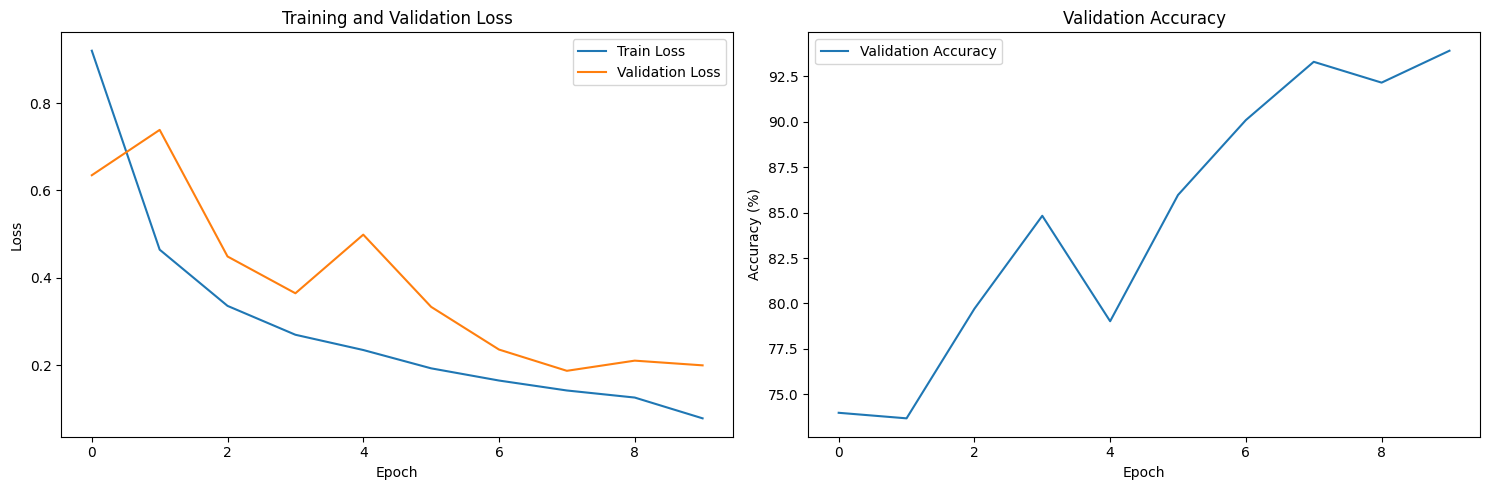

In [ ]:
# Plot training history
plot_training_history(history)

We now test our model on an example image from the test set and visualize the results. This helps us understand how the model performs on specific examples.

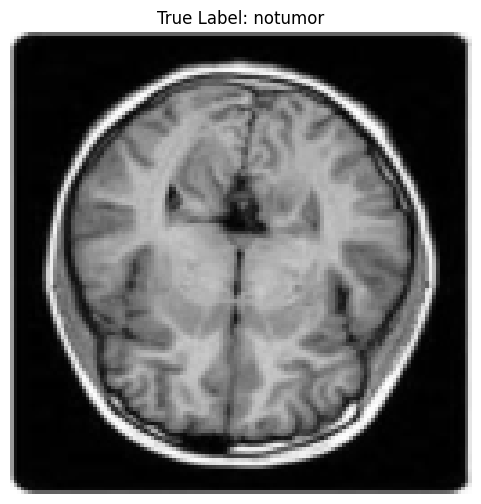

Predicted Class: notumor


In [ ]:
# Example prediction
sample_idx = 1000
img, label = test_set[sample_idx]
predicted_class = predict_single_image(model_cnn, img, test_set.classes)
print(f'Predicted Class: {predicted_class}')

We can now plot the confusion matrix of our predictions to understand if our model performs well/poorly for certain classes.

In [ ]:
confusion_matrix = conf_matrix(model_cnn, test_set)

In [ ]:
summary(confusion_matrix)